# HR Data Analysis
**Author:** Gowtham B M



## Table of Contents
1. [Setup](#Setup)
2. [Load Data](#Load-Data)
3. [Data Cleaning & EDA](#Data-Cleaning-&-EDA)
4. [Feature Engineering](#Feature-Engineering)
5. [Modeling](#Modeling)
6. [Evaluation](#Evaluation)
7. [Conclusions & Next Steps](#Conclusions-&-Next-Steps)

---


## Setup
Install and import required libraries. Keep this cell executable so reviewers can reproduce results.


In [1]:
# Standard imports used in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# add other imports you need below


In [4]:
#Import the required libaries.
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Project HR analysis/IMB553-XLS-ENG.xlsx')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Display top 5 rows
df.head()

,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [9]:
#Checking shape
df.shape

(12333, 17)

In [10]:
#Checking for nan values
df.isna().sum()

,0
Candidate.Ref,0
DOJ.Extended,0
Duration.to.accept.offer,2719
Notice.period,0
Offered.band,0
Pecent.hike.expected.in.CTC,747
Percent.hike.offered.in.CTC,596
Percent.difference.CTC,851
Joining.Bonus,0
Candidate.relocate.actual,0


In [11]:
#Droping NaN values
df.dropna(inplace = True)

In [12]:
#Checking for nan values
df.isnull().sum()

,0
Candidate.Ref,0
DOJ.Extended,0
Duration.to.accept.offer,0
Notice.period,0
Offered.band,0
Pecent.hike.expected.in.CTC,0
Percent.hike.offered.in.CTC,0
Percent.difference.CTC,0
Joining.Bonus,0
Candidate.relocate.actual,0


In [13]:
#Checking shape
df.shape

(9011, 17)

In [14]:
# Display columns
df.columns

Index(['Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [15]:
#Renaming the column names
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})
df.columns

Index(['Candidate_ref', 'DOJ_extended', 'Accept_duration', 'Notice_period',
       'Offered_band', 'Percent_hike_expected', 'Percent_hike_offered',
       'Percent_difference', 'Joining_Bonus', 'Relocated', 'Gender', 'Source',
       'Rex', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [16]:
#Rearranging Columns names ,
df = df[['Candidate_ref', 'Accept_duration','Notice_period','Percent_hike_expected',
         'Percent_hike_offered', 'Percent_difference','Rex','Age','DOJ_extended','Offered_band'
         ,'Joining_Bonus', 'Relocated', 'Gender','Source', 'LOB', 'Location','Status']]
df.head()

,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,2110407,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2112635,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,2112838,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,2115021,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,2115125,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [17]:
#Copying the df to df1
df1 = df.copy()
df1.head()

,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,2110407,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2112635,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,2112838,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,2115021,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,2115125,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [18]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df1)

https://docs.google.com/spreadsheets/d/1FTrA02cnpsgXbkZ_RvQPZh_QNvUvaRxIg9vbIIphy7M/edit#gid=0


In [19]:
#Extracting catgorical varibles
cat = ['DOJ_extended','Offered_band', 'Joining_Bonus', 'Relocated',
       'Gender','Source', 'LOB', 'Location', 'Status']

In [20]:
len(cat)

9

### Interact with data


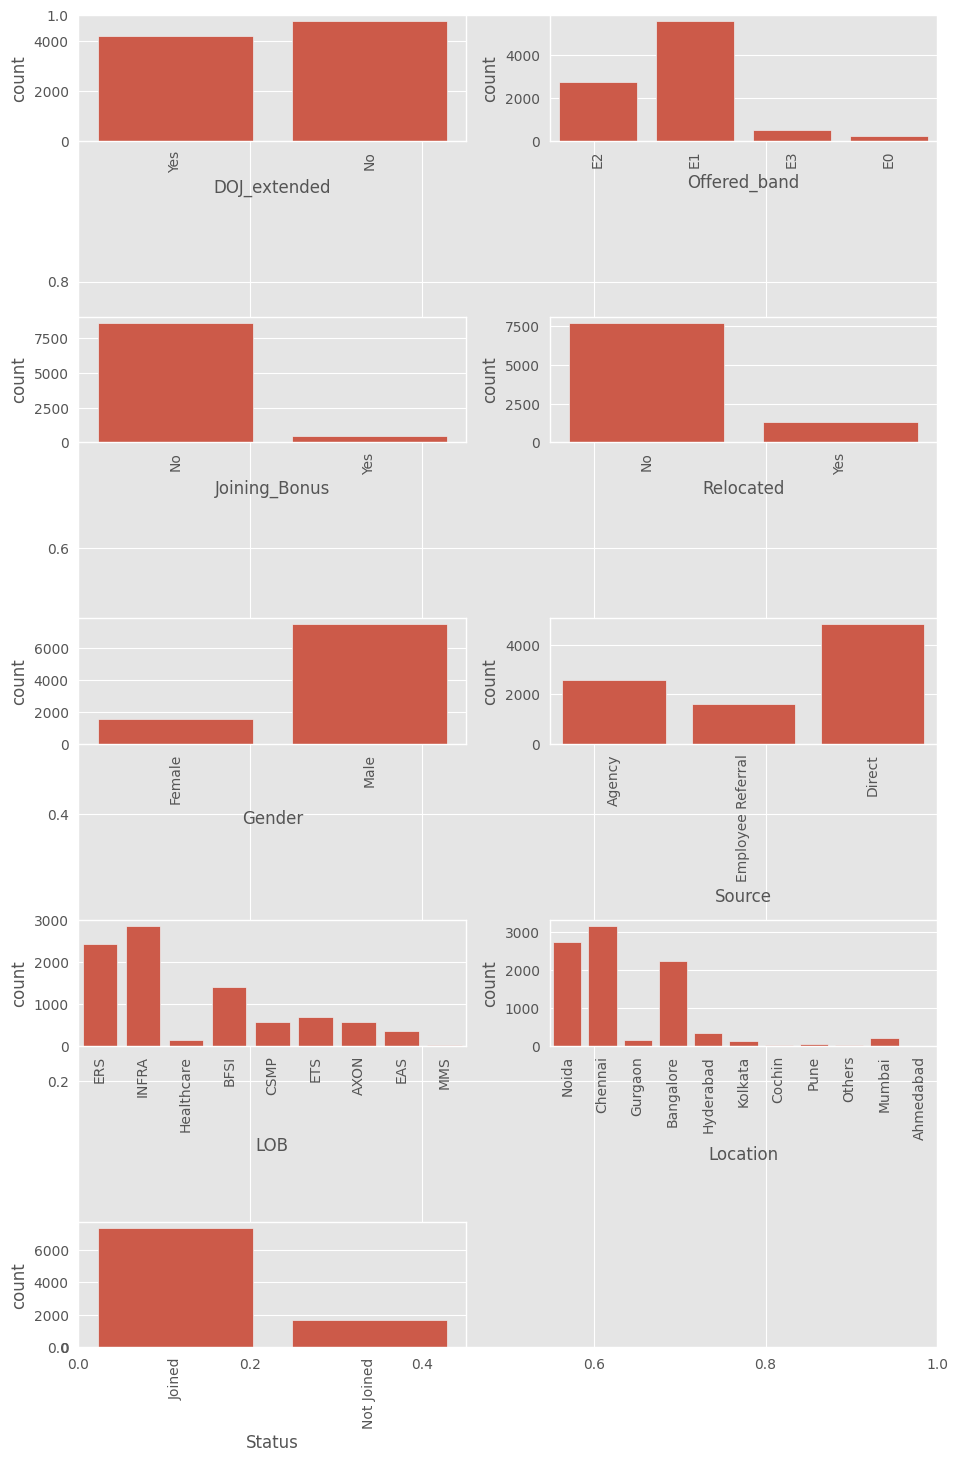

In [21]:
#Count plot for the catgorical varibles
fig=plt.subplots(figsize=(10,15))
length=len(cat)
n_rows = int(np.ceil(length / 2))
for i,j in itertools.zip_longest(cat,range(length)):
    plt.subplot(n_rows,2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df1)
    plt.xticks(rotation=90)

    plt.tight_layout()

## Observation from the above plots
1. Most of the candidates **didn't asked** for date of joining extension (DOJ).
2. Band offered to the candidate based on experience, performance in the interview rounds which is **E1** in most in number.
3. Most of the candidates **has not received** any joining bonus.
4. Most of the candidates **has not relocated** to any new city.
5. Most of the candidates are **Males**.
6. Most of the resumes obtained are **direct** and followed by the **Agency**.
7. Line of business(LOB) for which offer was give is more for **INFRA** and followed by **ERS,BFSI** and others.
8. **Chennai** is the place where most of the candidates got placed later by **Noida & Bangalore**.
9. Most candidates did **Joined** the offered job.


In [22]:
#Getting in numbers
df1['Status'].value_counts()

,count
Status,
Joined,7326
Not Joined,1685


In [25]:
#Extracting catgorical varibales to list comp
comp = ['DOJ_extended','Offered_band', 'Joining_Bonus', 'Relocated',
       'Gender','Source', 'LOB', 'Location']

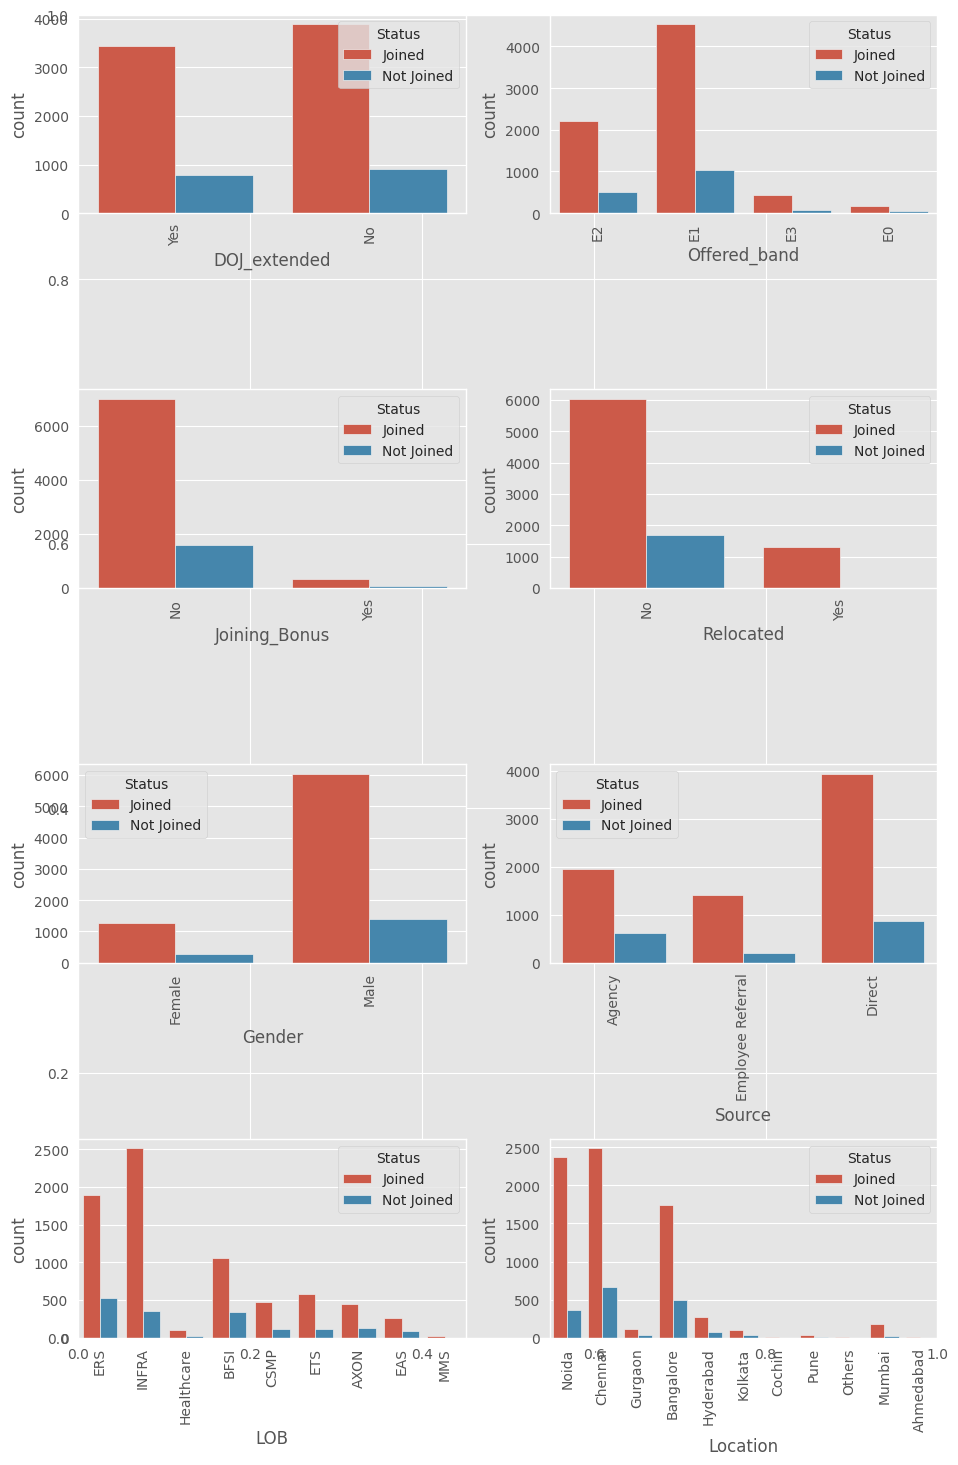

In [26]:
fig=plt.subplots(figsize=(10,15))
length=len(comp)
n_rows = int(np.ceil(length / 2))
for i,j in itertools.zip_longest(comp,range(length)):
    plt.subplot(n_rows,2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df1,hue='Status')
    plt.xticks(rotation=90)
    plt.tight_layout()

From the above observations we can observe most of candidates choose to join the job offered rather than the rejecting it.


In [27]:
#Statstical Info
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Candidate_ref,9011.0,2.843302e+06,486413.306729,2109586.00,2383377.00,2807385.0,3300058.00,3836076.00
Accept_duration,9011.0,2.136944e+01,25.938301,-228.00,3.00,10.0,33.00,224.00
Notice_period,9011.0,3.927866e+01,22.230658,0.00,30.00,30.0,60.00,120.00
Percent_hike_expected,9011.0,4.386152e+01,29.860747,-68.83,27.27,40.0,53.85,359.77
Percent_hike_offered,9011.0,4.065665e+01,36.084426,-60.53,22.08,36.0,50.00,471.43
Percent_difference,9011.0,-1.569059e+00,19.608174,-67.27,-8.33,0.0,0.00,300.00
Rex,9011.0,4.239929e+00,2.552387,0.00,3.00,4.0,6.00,24.00
Age,9011.0,2.991688e+01,4.116165,20.00,27.00,29.0,34.00,62.00


In [28]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
df1.drop(columns=['Candidate_ref'],inplace=True)

In [29]:
df1.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


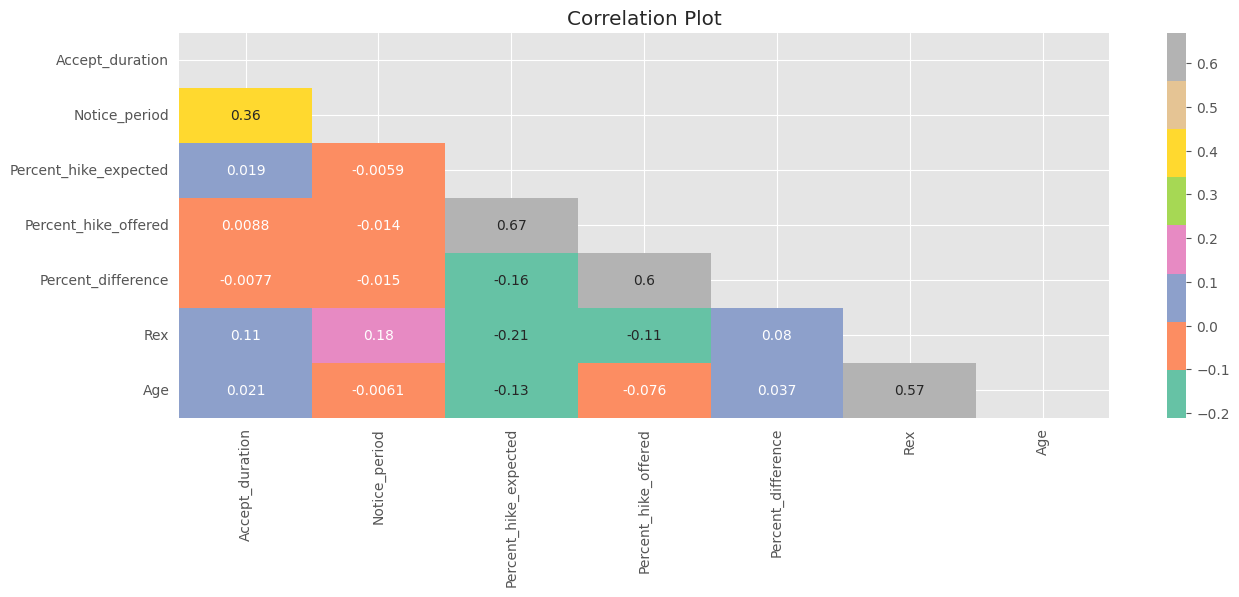

In [30]:
num_cols = [
    'Accept_duration', 'Notice_period', 'Percent_hike_expected',
    'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age'
]

num_df = df1[num_cols]

plt.figure(figsize=(15,5))
corr = num_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True

sns.heatmap(corr, cmap='Set2', annot=True, mask=mask)
plt.title('Correlation Plot')
plt.show()

We can see some relationship between the
> **Percent_hike_offered & Percent_hike_excpected**

> **Percent_difference & Percent_hike_offered**

> **Age & Rex**


In [31]:
#Independented Varibales
x = df1.iloc[:,:-1]
x.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location
0,14.0,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida
1,18.0,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai
2,3.0,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida
3,26.0,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida
4,1.0,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida


In [32]:
#Dependented Varibales
y = df1.iloc[:,-1]
y.head()

,Status
0,Joined
1,Joined
2,Joined
3,Joined
4,Joined


In [33]:
#Check unique attributes
df1['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [34]:
#Encoding the dependented variable to binary > Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [35]:
#Checking is replaced are not
y.unique()

array([0, 1])

### Creating Dummies


In [36]:
xd = pd.get_dummies(x,drop_first=True)

In [37]:
xd.keys()

Index(['Accept_duration', 'Notice_period', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age',
       'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2',
       'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male',
       'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP',
       'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA',
       'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

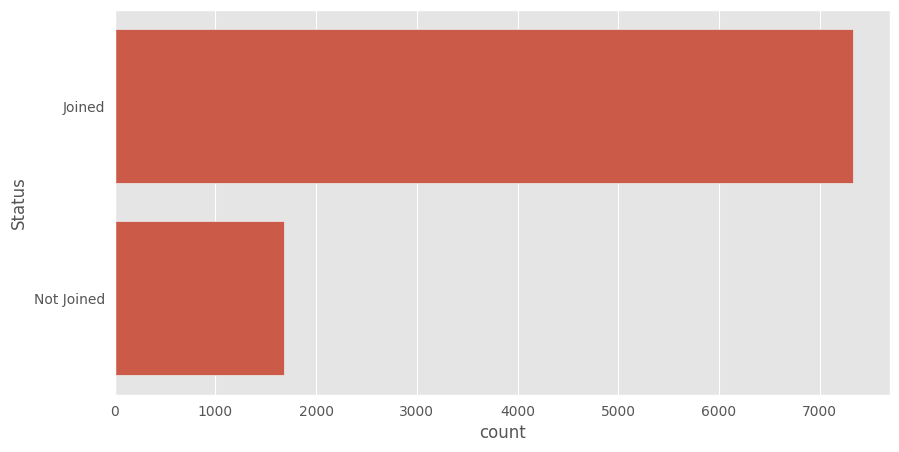

In [38]:
#Count plot for the Target variable
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df['Status'],ax=ax,)
plt.show()

From all above observation we can observe the **target variable** which is "Status" is inbalance in nature which is we can observe from above plot number of candidates joined are more in number than the Not Joined once. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the **Synthetic Minority Oversample TechniquE ( SMOTE )** for it to make it balance.


### Balancing the dataset using the SMOTE


In [39]:
#Importing the imblearn
import imblearn
from imblearn.over_sampling import SMOTE #Importing SMOTE

In [44]:
x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(xd,y) #resample fit

In [45]:
from collections import Counter
import pandas as pd

# 1. Did SMOTE actually run and what shapes were produced?
print("x_resam shape:", getattr(x_resam, "shape", None))
print("y_resam shape:", getattr(y_resam, "shape", None))

# 2. Quick peek
print("y_resam head:", pd.Series(y_resam).head().tolist())

# 3. Value counts (this will tell you if there's anything to plot)
print("y_resam value_counts:\n", pd.Series(y_resam).value_counts(dropna=False))

# 4. Data type / uniqueness
print("dtype:", pd.Series(y_resam).dtype)
print("n_unique:", pd.Series(y_resam).nunique())

x_resam shape: (14652, 34)
y_resam shape: (14652,)
y_resam head: [0, 0, 0, 0, 0]
y_resam value_counts:
 Status
0    7326
1    7326
Name: count, dtype: int64
dtype: int64
n_unique: 2


In [46]:
print(Counter(y))

Counter({0: 7326, 1: 1685})


x_resam shape: (14652, 34)
y_resam shape: (14652,)
y_resam head: [0, 0, 0, 0, 0]
y_resam dtype: int64
y_resam value_counts:
 Status
0    7326
1    7326
Name: count, dtype: int64
original y value_counts:
 Status
0    7326
1    1685
Name: count, dtype: int64


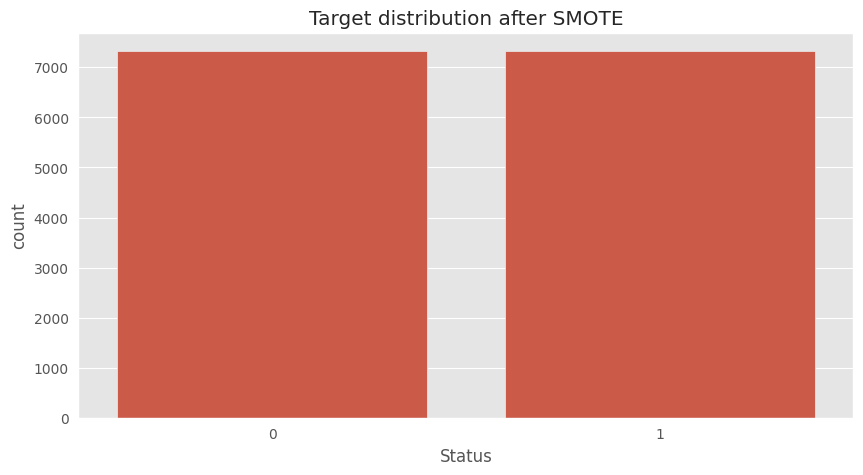

In [47]:
# 1. Confirm shapes
print("x_resam shape:", getattr(x_resam, "shape", None))
print("y_resam shape:", getattr(y_resam, "shape", None))

# 2. Confirm y_resam is 1-D and view counts
y_series = pd.Series(y_resam).squeeze()
print("y_resam head:", y_series.head().tolist())
print("y_resam dtype:", y_series.dtype)
print("y_resam value_counts:\n", y_series.value_counts(dropna=False))

# 3. Confirm original y to compare
print("original y value_counts:\n", pd.Series(y).value_counts())

# 4. Proper plotting (explicit x=)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=y_series, ax=ax)
ax.set_title("Target distribution after SMOTE")
plt.show()

From above observation we can see the **target variable which is 'y' (Status)** got balance


## Train Test


In [48]:
#Random seed
np.random.seed(1001)

In [49]:
#Importing train & test split
from sklearn.model_selection import train_test_split

In [50]:
#Spliting to train,test
x_train,x_test,y_train,y_test = train_test_split(x_resam,y_resam,test_size=0.2)

In [51]:
#Checking shape of train,test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11721, 34), (2931, 34), (11721,), (2931,))

In [52]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [53]:
#model_1 as Logistic class
model_1 = LogisticRegression()

In [54]:
#Fit model
model_1.fit(x_train,y_train)

LogisticRegression()

In [55]:
#Predicating the y_train with model_1
y_train_pred = model_1.predict(x_train)
y_test_pred = model_1.predict(x_test)

In [56]:
y_train_pred_prob = model_1.predict_proba(x_train)[:,1]
y_test_pred_prob = model_1.predict_proba(x_test)[:,1]

From the ROC we can see the we can see the **0.50** begin best fit threshold value, but let us find it from the MLE


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()

In [59]:
tn, fp, fn, tp

(np.int64(4792), np.int64(1088), np.int64(1313), np.int64(4528))

In [60]:
y_test_pred = model_1.predict(x_test)

In [61]:
y_test_pred_prob = model_1.predict_proba(x_test)[:,1] #considering only postive prob

### Lets us get some threshold value were the loss is minimum using the MLE (**Maximun Likehood Estimation**)


In [63]:
#Import logloss
from sklearn.metrics import log_loss

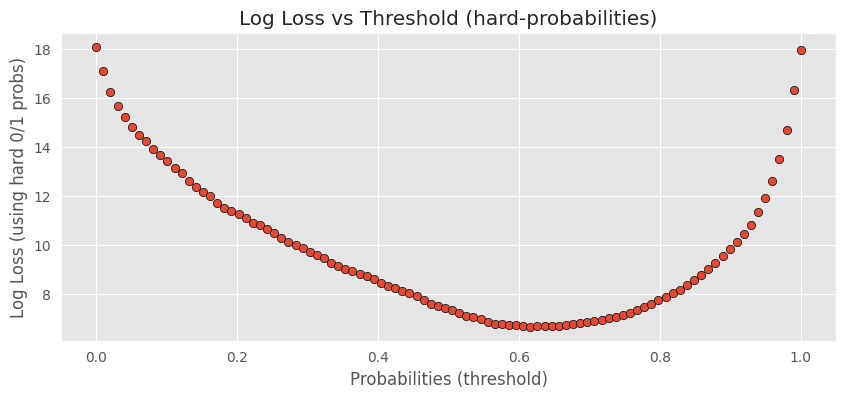

Best threshold (min log-loss): 0.616  — min log-loss = 6.663817


In [64]:
# --- safe cleanup (remove any accidental float named `threshold`) ---
if 'threshold' in globals():
    del threshold

# --- Threshold class (safe name, avoid collisions) ---
class Threshold:
    def __init__(self, th=0.5):
        self.th = float(th)
    def predict_threshold(self, prob):
        # defensively handle NaN / None
        if prob is None:
            return 0
        try:
            if np.isnan(prob):
                return 0
        except:
            pass
        return 1 if prob >= self.th else 0

# --- imports (ensure available) ---
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns

try:
    yy_probs = pd.Series(y_train_pred_prob).astype(float)
except NameError:
    raise NameError("y_train_pred_prob is not defined. Create it with: model.predict_proba(X_train)[:,1]")


pre = Threshold()
probailites = np.linspace(0, 1, num=100)
mle = []

for p in probailites:
    pre.th = float(p)

    yy = yy_probs
    y_pred = yy.apply(pre.predict_threshold)      # series of 0/1 labels at threshold p

    y_pred_prob = y_pred.astype(float)

    loss = log_loss(y_train, y_pred_prob, labels=[0,1])
    mle.append(loss)

plt.figure(figsize=(10,4))
sns.scatterplot(x=probailites, y=mle, edgecolor='k')
plt.xlabel('Probabilities (threshold)')
plt.ylabel('Log Loss (using hard 0/1 probs)')
plt.title('Log Loss vs Threshold (hard-probabilities)')
plt.grid(True)
plt.show()

best_idx = int(np.argmin(mle))
best_threshold = probailites[best_idx]
print(f"Best threshold (min log-loss): {best_threshold:.3f}  — min log-loss = {mle[best_idx]:.6f}")

We can observe the Log likehood is minimum in between the **0.57 - 0.63 (approx)** from the above plot


In [65]:
#Getting minimum Logloss
min_ind = np.array(mle).argmin()
val = probailites[min_ind]
print('Threshold Probability Value = ',val.round(6))

Threshold Probability Value =  0.616162


### Apply Threshold Probability on the Train & Test data


In [67]:
pre.th = val
yy_test = pd.Series(y_test_pred_prob)
yy_train = pd.Series(y_train_pred_prob)
y_pred_test = yy_test.apply(pre.predict_threshold)
y_pred_train = yy_train.apply(pre.predict_threshold)

In [68]:
cr = classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1446
           1       0.91      0.71      0.80      1485

    accuracy                           0.82      2931
   macro avg       0.84      0.82      0.82      2931
weighted avg       0.84      0.82      0.82      2931



In [69]:
cr = classification_report(y_train,y_pred_train)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      5880
           1       0.90      0.70      0.79      5841

    accuracy                           0.82     11721
   macro avg       0.83      0.81      0.81     11721
weighted avg       0.83      0.82      0.81     11721



## Feature Selection


### Before going to feature selection we can see some multicolinearity (*from co-relation plot*) between the varibales.
## Using VIF (Variance Inflation Factor) for checking the colinearity.


In [70]:
#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [71]:
#Assign class to sc
sc = StandardScaler()

In [72]:
#Standardzation x values
x_stand = sc.fit_transform(xd)

In [73]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(xd.keys()))]

In [75]:
#View VIF
vif.index = xd.columns
vif.head(8)

,Score
Accept_duration,1.332379
Notice_period,1.241396
Percent_hike_expected,16.673744
Percent_hike_offered,25.058072
Percent_difference,14.201572
Rex,3.070669
Age,1.570151
DOJ_extended_Yes,1.220850


**Precent_hike_expected**, **Percent_hike_offered**, **Percent_difference** have some **VIF** greater than 10 which are highly corelated, and sometimes the categorical values have higher VIF (inf) we can ignore them.


### using **recursive feature elimination and cross-validated** for optimal feature selection


In [76]:
#Importing REFCV
from sklearn.feature_selection import RFECV

In [77]:
#Using estimator as LogisticsRegression with Step1 and cross-validation of 10 scoring metric as average_precision
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='average_precision')
rfecv.fit(xd, y)

RFECV(cv=10, estimator=LogisticRegression(), scoring='average_precision')

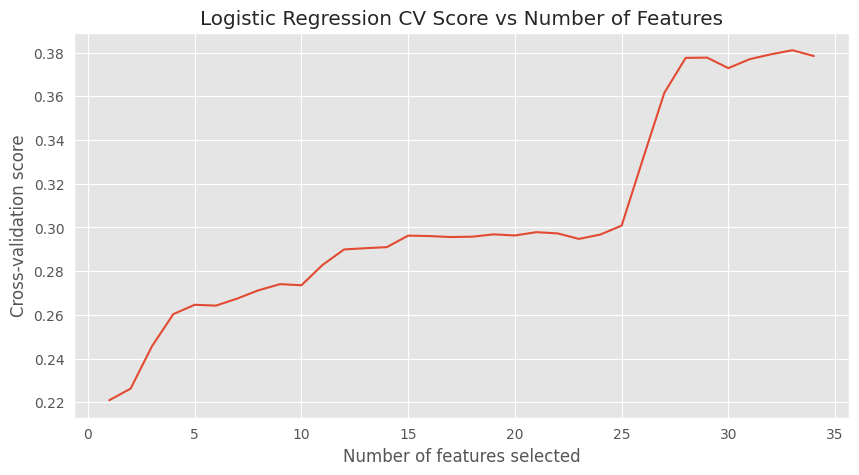

In [78]:
# Extract CV scores from RFECV (modern sklearn)
scores = rfecv.cv_results_['mean_test_score']

plt.figure(figsize=(10,5))
plt.title('Logistic Regression CV Score vs Number of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(scores) + 1), scores)
plt.show()

In [79]:
#Getting the selected features
feature_names = xd.columns
selected_features = feature_names[rfecv.support_].tolist()
print("No of Features = {}\nNo of Feature Selected = {}\n {}".format(len(feature_names),len(selected_features),selected_features))

No of Features = 34
No of Feature Selected = 33
 ['Notice_period', 'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age', 'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2', 'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male', 'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai', 'Location_Noida', 'Location_Others', 'Location_Pune']


In [80]:
#New dataframe using the selected features
xf = xd[['Notice_period', 'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age', 'DOJ_extended_Yes',
         'Offered_band_E1', 'Offered_band_E2', 'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes',
         'Gender_Male', 'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS',
         'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon',
         'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai', 'Location_Noida', 'Location_Others', 'Location_Pune']]

In [81]:
#View
xf.head(3)

,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended_Yes,Offered_band_E1,Offered_band_E2,Offered_band_E3,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,30,-20.79,13.16,42.86,7,34,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,30,50.00,320.00,180.00,8,34,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,45,42.84,42.84,0.00,4,27,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [82]:
#Resampling with the selected features
xf_re,y_re = SMOTE(k_neighbors=5).fit_resample(xf,y)

In [83]:
#Spliting to train,test
xf_train,xf_test,yf_train,yf_test = train_test_split(xf_re,y_re,test_size=0.2)

In [84]:
#Checking shape of train,test
xf_train.shape,xf_test.shape,yf_train.shape,yf_test.shape

((11721, 33), (2931, 33), (11721,), (2931,))

In [85]:
#model_2 as Logistic class
model_2 = LogisticRegression()

In [86]:
#Fit model
model_2.fit(xf_train,yf_train)

LogisticRegression()

In [87]:
#Predicating the y_train with new build model
yf_train_pred = model_2.predict(xf_train)

In [88]:
#considering only postive prob
yf_train_pred_prob = model_2.predict_proba(xf_train)[:,1]

In [89]:
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve)

In [91]:
#Getting TN FP FN TP
tn, fp, fn, tp = confusion_matrix(yf_train,yf_train_pred).ravel()

In [92]:
tn, fp, fn, tp

(np.int64(4628), np.int64(1224), np.int64(1298), np.int64(4571))

### Given criteria:
Cost of predicting **“Not Joining” as “Joining” (FPs) cases is 3 times
more than predicting “Joining” as “Not Joining” (FNs)**
From above we can see **FP's**:2344, **FN's**:1429 which is FP's are ~1.64 greater than FN's we doesn't satifies the conditions

_from the_ **_above ROC_AUC _curve_** it is clear that the threshold probality value should be decreased in order to satifies the given criteria. but lets us find the point were the FP's to FN's ratio increase are decrease


In [93]:
#A Simple loop to fit the given criteria
probailites = np.linspace(0,1,num=100) #Genrating 100 values in between 0-1
FP = [] #Store the genrated FP's in the list FP
FN = [] #Store the genrated FN's in the list FN
for p in probailites:
  pre.th = p
  yyf = pd.Series(yf_train_pred_prob)
  yf_pred = yyf.apply(pre.predict_threshold)
  tn, fp, fn, tp = confusion_matrix(yf_train,yf_pred).ravel()
  FP.append(fp)
  FN.append(fn)

In [94]:
#Simple DataFrame to get the ratio between the FP's & FN's
FPS = pd.DataFrame(index=probailites) #Making index as probailies
FPS['FP'] = FP #Adding the FP
FPS['FN'] = FN #Adding the FN
FPS['Ratio'] = np.array(FP)/np.array(FN) #Finding the ratio between them

In [95]:
#View
FPS.head()

,FP,FN,Ratio
0.000000,5852,0,inf
0.010101,5472,4,1368.000000
0.020202,5185,12,432.083333
0.030303,5001,25,200.040000
0.040404,4851,35,138.600000


In [96]:
#Filterting the ratio to be greater than '3'
FPS[FPS["Ratio"]>3]

,FP,FN,Ratio
0.000000,5852,0,inf
0.010101,5472,4,1368.000000
0.020202,5185,12,432.083333
0.030303,5001,25,200.040000
0.040404,4851,35,138.600000
0.050505,4719,45,104.866667
0.060606,4611,59,78.152542
0.070707,4515,77,58.636364
0.080808,4414,92,47.978261
0.090909,4337,105,41.304762


In [97]:
#Predicating the test values
yf_test_pred = model_2.predict(xf_test)
yf_test_pred

array([1, 0, 1, ..., 0, 1, 0])

In [98]:
#considering only postive prob
yf_test_pred_prob = model_2.predict_proba(xf_test)[:,1]
yf_test_pred_prob_df = pd.DataFrame(yf_test_pred,yf_test_pred_prob)

In [99]:
yf_test_pred_prob_df.head(30)

,0
0.615207,1
0.009376,0
0.745946,1
0.418385,0
0.081927,0
0.220164,0
0.207097,0
0.002330,0
0.325823,0
0.909488,1


In [100]:
#Predicating again with the new prob value
#pre.th = 0.4444
pre.th = 0.595
yyf_test = pd.Series(yf_test_pred_prob)
yyf_train = pd.Series(yf_train_pred_prob)
yf_pred_test = yyf_test.apply(pre.predict_threshold)
yf_pred_train = yyf_train.apply(pre.predict_threshold)

In [101]:
#classification report for new genrated values !train
cr = classification_report(yf_train,yf_pred_train)
tn, fp, fn, tp = confusion_matrix(yf_train,yf_pred_train).ravel()
print(cr)
print("TP's = {}\nFP's = {} \nFN's = {} \nTN's = {} ".format(tp, fp, fn, tn))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5852
           1       0.87      0.72      0.79      5869

    accuracy                           0.81     11721
   macro avg       0.82      0.81      0.80     11721
weighted avg       0.82      0.81      0.80     11721

TP's = 4210
FP's = 618 
FN's = 1659 
TN's = 5234 


In [102]:
#classification report for new genrated values !test
cr = classification_report(yf_test,yf_pred_test)
tn, fp, fn, tp = confusion_matrix(yf_test,yf_pred_test).ravel()
print(cr)
print("TP's = {}\nFP's = {} \nFN's = {} \nTN's = {} ".format(tp, fp, fn, tn))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1474
           1       0.87      0.71      0.78      1457

    accuracy                           0.80      2931
   macro avg       0.81      0.80      0.80      2931
weighted avg       0.81      0.80      0.80      2931

TP's = 1037
FP's = 160 
FN's = 420 
TN's = 1314 


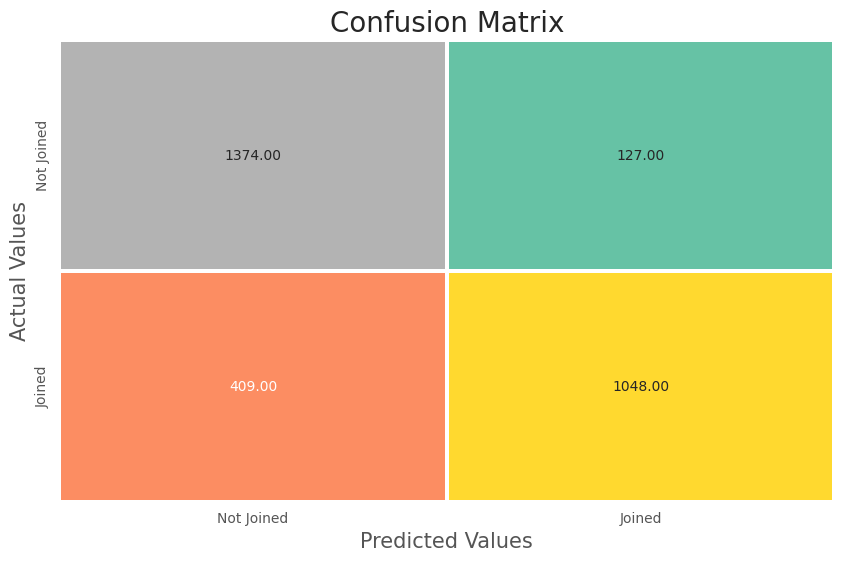

In [103]:
#confusion matrix for new genrated data
plt.figure(figsize=(10,6))
sns.heatmap(np.array([[1374,127],[409,1048]]),annot=True,fmt='.2f',cbar=False
            ,xticklabels=['Not Joined','Joined'],yticklabels=['Not Joined','Joined'],cmap='Set2',linewidths=1.5)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

_! Below values are for the test data_

**Precision = $\frac{TP's}{TP's + FP's}$ = $\frac{1048}{1048 + 127}$ ~ 0.89**

**Sensitivity/Recall = $\frac{TP's}{TP's + FN's}$ = $\frac{1048}{1048 + 409}$ ~ 0.72**

**Specificity = $\frac{TN's}{TN's + FP's}$ = $\frac{1347}{1347 + 127}$ ~ 0.91**

**Accuracy = $\frac{TP's + TN's}{TP's + TN's + FP's + FN's}$ = $\frac{1347}{1347 + 127}$ ~ 0.81**
